<a href="https://colab.research.google.com/github/ARJUN108-verma/TensorFlow_Practice/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
print("Image classificatio")

Image classificatio


In [33]:
print("image classification file ")

image classification file 


we use keras API here

In [34]:
import tensorflow as tf

#library
import numpy as np
import matplotlib.pyplot as plt

print("version checking : ", tf.__version__)

version checking :  2.18.0


Import the Fashion MNIST dataset

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data

In [37]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [38]:
len(train_labels)

60000

Each label is an integer between 0 and 9

In [39]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [40]:
test_images.shape

(10000, 28, 28)

check length

In [41]:
len(test_images)

10000

process the data

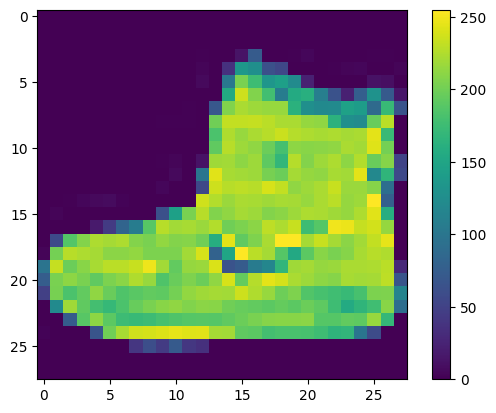

In [42]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:
train_images = train_images/255.0
test_images = test_images/255.0

To verify, lets display some images

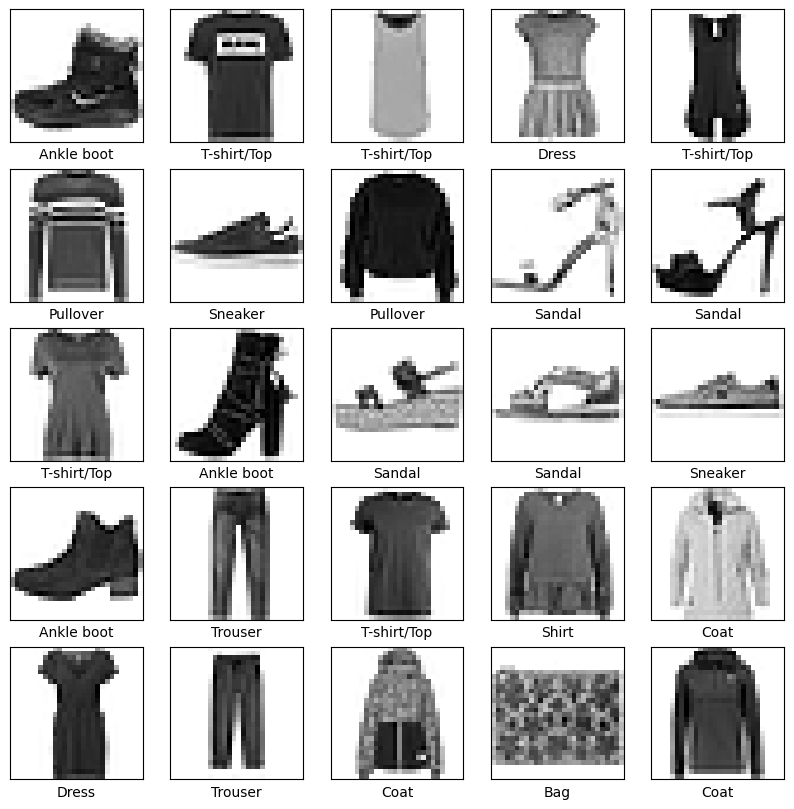

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

Build the model

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train and feed the model

In [47]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7809 - loss: 0.6231
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8633 - loss: 0.3850
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8772 - loss: 0.3377
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8852 - loss: 0.3189
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8924 - loss: 0.2884
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8988 - loss: 0.2746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9023 - loss: 0.2668
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9080 - loss: 0.2503
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9097 - loss: 0.2420
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9130 - loss: 0.2329


Evaluate Accuracy

In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose= 2)
print('\nTest accuracy :', test_acc)
print('\nTest loss : ', test_loss)

313/313 - 0s - 2ms/step - accuracy: 0.8852 - loss: 0.3312

Test accuracy : 0.885200023651123

Test loss :  0.33116671442985535


Make predictions

In [49]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [51]:
predictions[0]

array([4.2411114e-07, 9.9459996e-10, 2.7847886e-09, 4.1574838e-12,
       2.9875906e-09, 6.1154214e-04, 8.2872145e-09, 8.3909295e-03,
       1.2117954e-08, 9.9099702e-01], dtype=float32)

In [52]:
np.argmax(predictions[0])

np.int64(9)

prediction

In [53]:
def plot_images(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

verify prediction

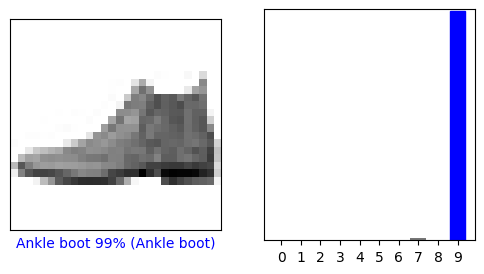

In [54]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

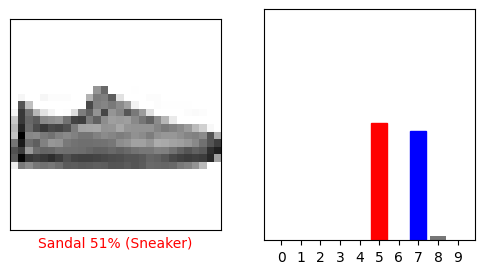

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

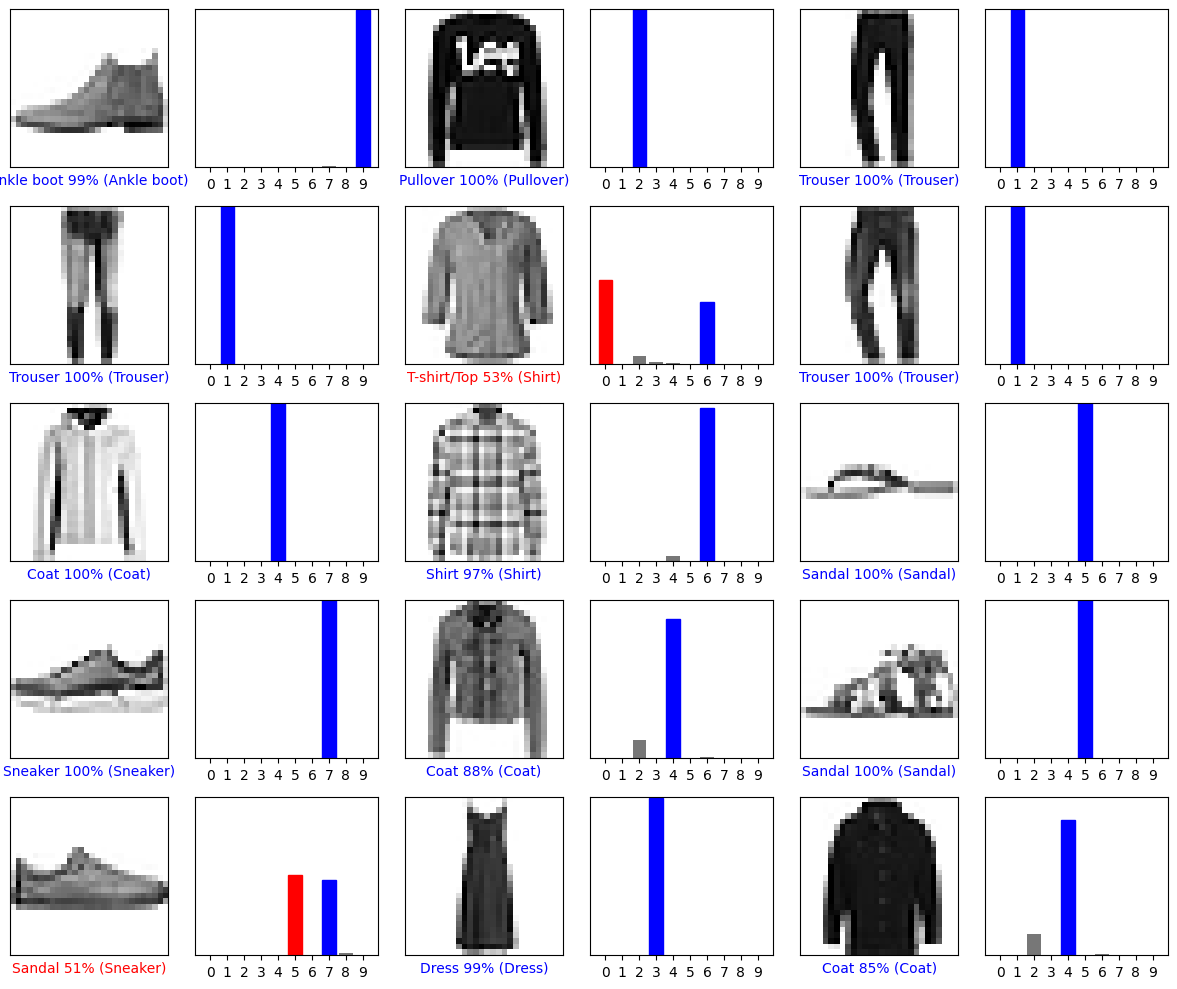

In [56]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model

In [57]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [58]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [59]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[3.9213053e-05 1.6380146e-10 9.9725878e-01 2.9367506e-09 2.5643446e-03
  1.5375408e-09 1.3751647e-04 1.9039219e-13 8.6834454e-08 4.5675939e-09]]


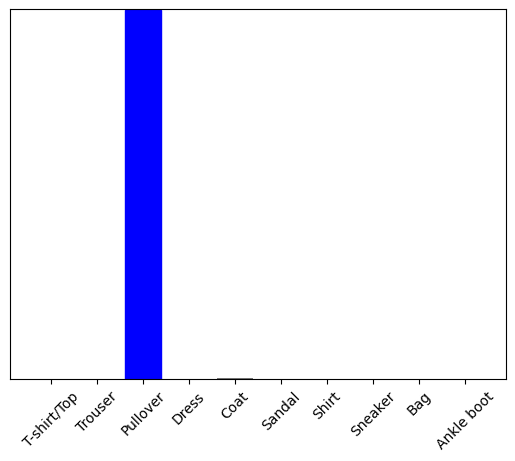

In [60]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()